In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('../data/county_election_results.csv')
df['pct_D'] = (df['votes_D_2020'] / df['votes_total_2020']) * 100
df['pct_R'] = (df['votes_R_2020'] / df['votes_total_2020']) * 100

# Keys

STATE = 'state'
PCT_D = 'pct_D'
PCT_R = 'pct_R'
V_TOTAL = 'votes_total_2020'
V_D = 'votes_D_2020'
V_R = 'votes_R_2020'


**1.** Elija dos estados de EEUU y compare la distribución de votos republicanos y demócratas a través de estadísticas descriptivas. Elabore también un gráfico de caja, y comente sobre las similitudes y diferencias que puede inferir a partir del análisis exploratorio gráfico y cuantitativo.<br>

In [2]:
group = df.groupby(STATE)[[PCT_D, PCT_R]].mean()

state_more_d = group[PCT_D].idxmax()
state_more_r = group[PCT_R].idxmax()

print("Estado con mayor votación demócrata", state_more_d, group[PCT_D][state_more_d], group[PCT_R][state_more_d])
print("Estado con mayor votación republicano", state_more_r, group[PCT_D][state_more_r], group[PCT_R][state_more_r])

states = [state_more_d, state_more_r]
df_states = df[df['state'].isin(states)]

Estado con mayor votación demócrata DC 93.23048265974074 5.4606245078798
Estado con mayor votación republicano NE 19.888194452640803 78.28542544433259


Note: Incluso en el estado con mayor influencia republicana, dicha influencia no es tan fuerte como la influencia de los demócratas en su estado de mayor domino

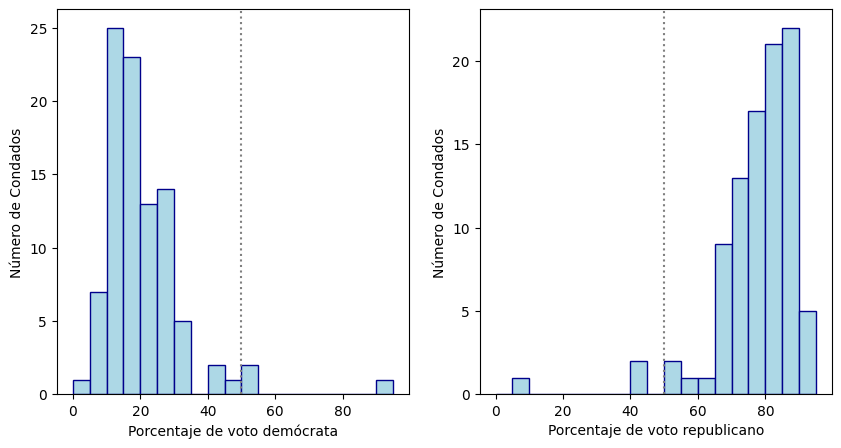

In [3]:
fig = plt.figure(figsize=(10,5))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

bins = np.arange(0,100,5)

ax1.hist(df_states[PCT_D], bins=bins, histtype='bar', ec='darkblue', fc='lightblue')
ax2.hist(df_states[PCT_R], bins=bins, histtype='bar', ec='darkblue', fc='lightblue')

def plot(ax, label):
    ax.set_xlabel(label)
    ax.set_ylabel('Número de Condados')
    ax.axvline(x=50, ls=':', color='gray')

plot(ax1, 'Porcentaje de voto demócrata')
plot(ax2, 'Porcentaje de voto republicano')

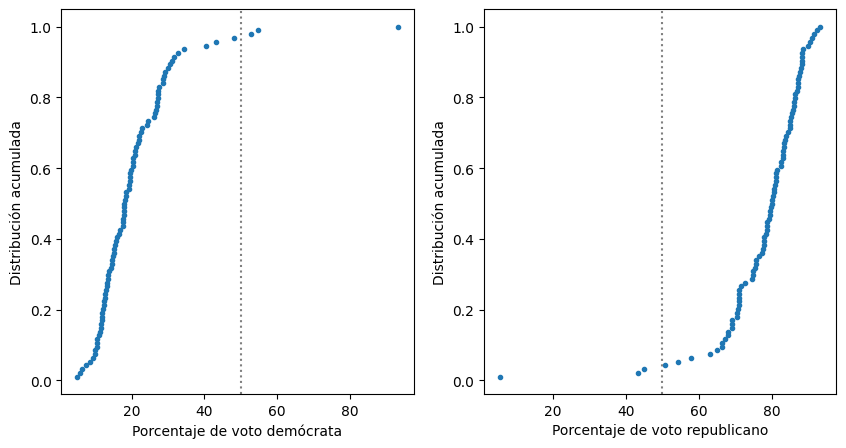

In [4]:
fig = plt.figure(figsize=(10,5))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

def fdae(data):
    n=len(data)
    x=np.sort(data)
    y=np.arange(1,len(x)+1)/len(x)
    return(x,y)

def plot(x, y, ax, label):
    ax.plot(x, y, marker='.', ls='none')
    ax.set_xlabel(label)
    ax.set_ylabel('Distribución acumulada')
    ax.axvline(x=50,ls=':',color='gray')

x, y = fdae(df_states[PCT_D])
plot(x, y, ax1, 'Porcentaje de voto demócrata')

x, y = fdae(df_states[PCT_R])
plot(x, y, ax2, 'Porcentaje de voto republicano')

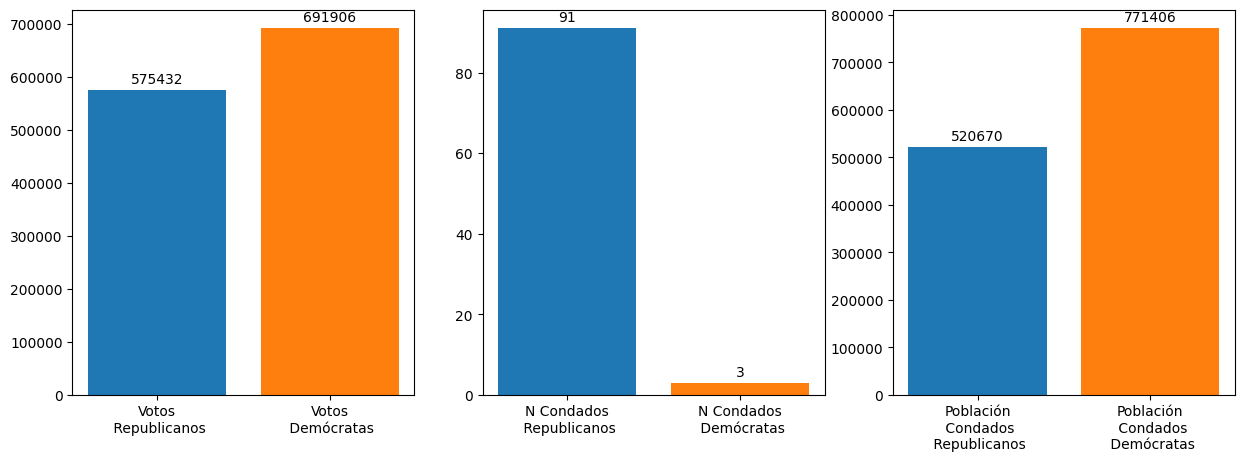

In [5]:
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(132)
ax3 = fig.add_subplot(133)

bar_colors = ['tab:blue', 'tab:orange']

labels = 'Votos\n Republicanos', 'Votos\n Demócratas'
sizes = [df_states[V_R].sum(), df_states[V_D].sum()]

rects = ax1.bar(labels, sizes, color=bar_colors)
ax1.bar_label(rects, padding=3)

county_r = df_states[df_states[PCT_R] > 50]
county_d = df_states[df_states[PCT_D] > 50]

labels = 'N Condados\n Republicanos', 'N Condados\n Demócratas'
sizes = [len(county_r), len(county_d)]

rects = ax2.bar(labels, sizes, color=bar_colors)
ax2.bar_label(rects, padding=3)

labels = 'Población\n Condados\n Republicanos', 'Población\n Condados\n Demócratas'
sizes = [county_r[V_TOTAL].sum(), county_d[V_TOTAL].sum()]

rects = ax3.bar(labels, sizes, color=bar_colors)
_ = ax3.bar_label(rects, padding=3)


In [6]:
print(len(county_d), len(county_d[county_d[STATE] == state_more_r]), county_d[county_d[STATE] == state_more_r][V_TOTAL].sum())

3 2 431042


**2.** A partir de los datos entregados, estudie la posible correlación entre la fracción de votos republicanos (o demócratas) y alguna otras de las variables incluidas en la base de datos. Puede trabajar con todos los estados, o con alguna selección de ellos. Para este estudio, se requiere:<br>

a) Explorar y proponer una posible correlación o relación analítica entre variables.<br>
b) Plantear una hipótesis que refleje esta correlación.<br>
c) Diseñar y realizar el test de hipótesis.<br>
d) Concluir acerca de la validez y significancia de la correlación identificada.<br>

In [7]:
df.columns

Index(['Unnamed: 0', 'FIPS', 'eevp', 'electTotal', 'electionDate', 'level',
       'office', 'state', 'winner', 'votes_R_2020', 'votes_D_2020',
       'votes_third_party_2020', 'votes_total_2020', 'export_time',
       'acs_pct_pop_nonwhite', 'acs_pct_management', 'acs_pct_service',
       'pct_pop25+_bachelor_higher', 'median_household_income',
       'per_capita_income', 'category_education', 'category_income',
       'category_nonwhite', 'category_jobs_management',
       'category_jobs_service', 'pew_classification', 'region',
       'category_unemployment', 'date', 'POPESTIMATE2019', 'deaths',
       'deaths_per_thousand', 'deaths_percap_pctile', 'cases',
       'cases_per_thousand', 'cases_percap_pctile', 'case_pct_change',
       'BLS_Area_Code', 'Month', 'Month_Str', 'Labor Force', 'Employment',
       'Unemployment', 'Unemployment Rate', 'county', 'pct_2000_dem',
       'pct_2000_gre', 'pct_2000_rep', 'pct_2004_dem', 'pct_2004_rep',
       'pct_2008_dem', 'pct_2008_rep', 'pct_

In [8]:
columns = [
    'FIPS', 'eevp', 'D_winner', 
    'pct_D', 'pct_R', 'Unemployment Rate', 
    'Unemployment', 'Employment', 'Labor Force', 
    'acs_pct_pop_nonwhite', 'acs_pct_management', 
    'acs_pct_service', 'pct_pop25+_bachelor_higher',
    'median_household_income', 'per_capita_income', 'deaths',
    # 'deaths_per_thousand', 'deaths_percap_pctile', 'cases'
]

df['D_winner'] = df['winner'].map({'R': 0, 'D': 1})
df[columns]

,FIPS,eevp,D_winner,pct_D,pct_R,Unemployment Rate,Unemployment,Employment,Labor Force,acs_pct_pop_nonwhite,acs_pct_management,acs_pct_service,pct_pop25+_bachelor_higher,median_household_income,per_capita_income,deaths
0,1061,100,0,12.726402,86.555493,3.9,428.0,10519.0,10947.0,16.065834,25.1,16.0,11.1,38142.0,20471.0,7
1,1021,100,0,15.937970,83.424096,4.7,925.0,18628.0,19553.0,19.861143,24.3,13.3,14.2,45182.0,24611.0,31
2,1049,100,0,14.611919,84.534781,3.8,1225.0,31427.0,32652.0,19.324438,23.2,15.8,12.7,39233.0,21004.0,26
3,1093,100,0,10.614525,88.551114,4.2,584.0,13221.0,13805.0,8.029368,26.0,14.2,13.1,35392.0,21391.0,29
4,1059,100,0,16.597708,82.558880,3.6,557.0,14706.0,15263.0,22.918648,23.7,13.9,12.9,40459.0,19776.0,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2293,45083,100,0,35.603242,62.937674,7.0,10973.0,145208.0,156181.0,31.409851,31.0,15.7,23.8,50179.0,26072.0,211
2294,45021,100,0,27.633558,71.400871,8.3,2199.0,24246.0,26445.0,27.081166,22.8,15.1,13.8,35836.0,21432.0,48
2295,45051,100,0,32.924604,66.105684,8.2,12334.0,137231.0,149565.0,22.831279,28.2,25.1,23.6,48279.0,26917.0,207
2296,45089,100,0,64.366594,34.607444,9.4,1189.0,11429.0,12618.0,68.795999,23.7,21.2,12.7,32351.0,18454.0,46


In [9]:
states = df[STATE].drop_duplicates()

In [43]:
result = []
for i, s1 in enumerate(states):
    for j, s2 in enumerate(states):
        if s1 == s2: continue
        tem_df = df[df[STATE].isin([s1, s2])] 
        corr_matrix = tem_df[columns].corr()
        
        corr_var = corr_matrix[PCT_D].drop(PCT_D)
        key = corr_var.idxmax()

        result.append((s1, s2, key, corr_var[key])) 

result = pd.DataFrame({'s1': s1, 's2': s2, 'field': field, 'value': value} for s1, s2, field, value in result)
result = result[result['value'] > 0.9]
result

,s1,s2,field,value
0,AL,AR,acs_pct_pop_nonwhite,0.928995
1,AL,AZ,acs_pct_pop_nonwhite,0.940924
5,AL,DC,acs_pct_pop_nonwhite,0.961932
6,AL,DE,acs_pct_pop_nonwhite,0.954525
8,AL,GA,acs_pct_pop_nonwhite,0.923918
...,...,...,...,...
1502,RI,ME,pct_pop25+_bachelor_higher,0.904483
1521,SC,AL,acs_pct_pop_nonwhite,0.970016
1531,SC,HI,acs_pct_pop_nonwhite,0.930047
1538,SC,LA,acs_pct_pop_nonwhite,0.928801


In [44]:
result.groupby('field').count().sort_values('value')

,s1,s2,value
field,,,
D_winner,2,2,2
deaths,2,2,2
median_household_income,2,2,2
per_capita_income,2,2,2
pct_pop25+_bachelor_higher,4,4,4
acs_pct_pop_nonwhite,70,70,70


La columna "acs_pct_pop_nonwhite" probablemente se refiere al porcentaje de población no blanca según la encuesta anual de la comunidad estadounidense (ACS, por sus siglas en inglés). Esta encuesta es realizada por la Oficina del Censo de los Estados Unidos y recopila información detallada sobre la población y la vivienda en los Estados Unidos. 

Por lo tanto, asumiendo que el dataset que mencionas está relacionado con las votaciones en Estados Unidos, es posible que la columna "acs_pct_pop_nonwhite" se utilice como una variable independiente para analizar cómo la proporción de la población no blanca en un estado afecta la votación en ese estado. Es importante mencionar que solo se trata de una suposición en base al nombre de la columna y que la interpretación precisa podría depender del contexto específico del dataset que estés usando.

Gracias por la aclaración. "acs_pct_pop_nonwhite" no es estrictamente un diminutivo de cuatro palabras, sino un acrónimo que representa una combinación de términos más largos. 

En este caso, "acs" se refiere a la encuesta anual de la comunidad estadounidense (American Community Survey en inglés), "pct" es una abreviatura de porcentaje (percentage en inglés), "pop" es una abreviatura de población y "nonwhite" significa no blanca o de una raza diferente a la blanca. Por lo tanto, "acs_pct_pop_nonwhite" se refiere al porcentaje de población no blanca según la encuesta anual de la comunidad estadounidense.

De los 40 hay 19 estados distintos en los que los datos muestras una alta correlación entre el porcentaje de voto demócrata y su porcentaje de poblacion no blanca segun el ACS


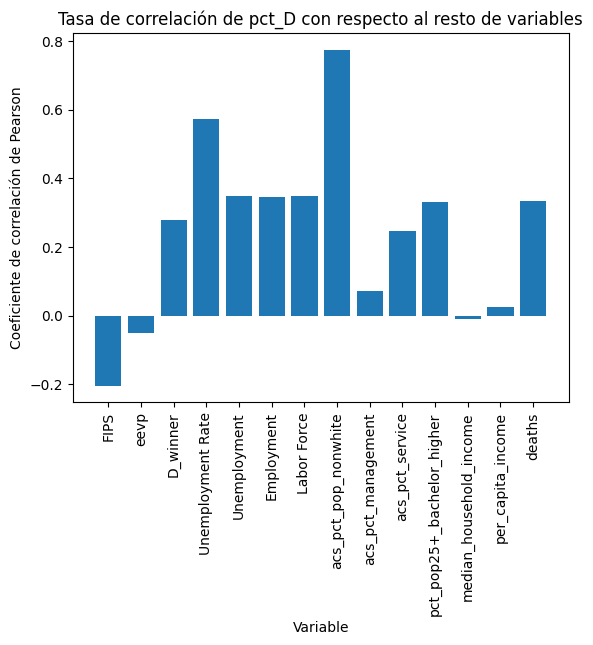

In [74]:
corr_state = result[result['field'] == 'acs_pct_pop_nonwhite']
corr_state = corr_state.sort_values('value', ascending=False)
corr_state = corr_state['s1'].drop_duplicates()

print(
f'De los {len(states)} hay {len(corr_state)} estados distintos en los que los datos muestras',
'una alta correlación entre el porcentaje de voto demócrata',
'y su porcentaje de poblacion no blanca segun el ACS'
)


corr_df = df[df['state'].isin(corr_state)][columns]
corr_matrix = corr_df.corr()
corr_var = corr_matrix[PCT_D].drop([PCT_D, PCT_R])


plt.bar(corr_var.index, corr_var.values)
plt.title(f'Tasa de correlación de {PCT_D} con respecto al resto de variables')
plt.xlabel('Variable')
plt.ylabel('Coeficiente de correlación de Pearson')
plt.xticks(rotation=90)
plt.show()

Covarianza: 253.6134812181926
Pearson: 0.7754962897017232


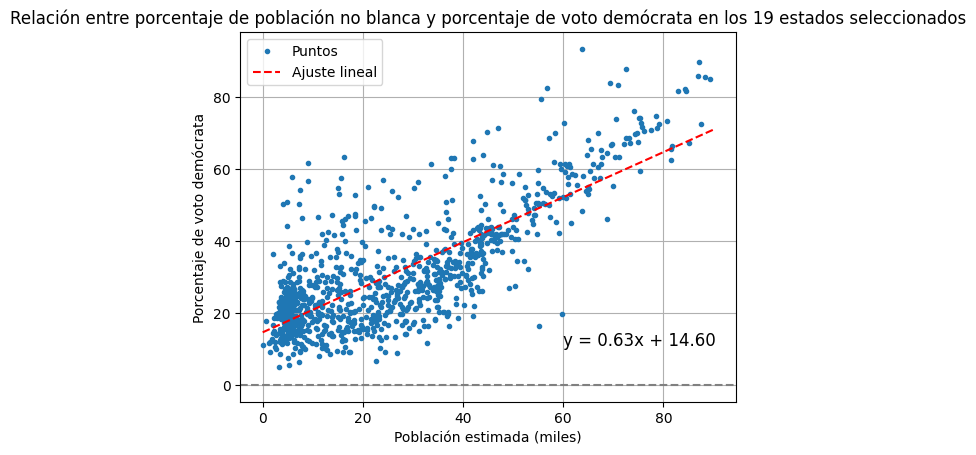

In [73]:
x = corr_df['acs_pct_pop_nonwhite']
y = corr_df['pct_D']

cov = np.cov(x,y)
print('Covarianza:', cov[0,1])

pearson = np.corrcoef(x,y)
print('Pearson:', pearson[0,1])

a, b = np.polyfit(x, y, 1)
xf = np.arange(0, 100, 10)
yf = a * xf + b
plt.plot(x, y, '.', label='Puntos')
plt.plot(xf, yf, '--', color='red', label='Ajuste lineal')

# Título, leyenda y etiquetas de los ejes
plt.title('Relación entre porcentaje de población no blanca y porcentaje de voto demócrata en los 19 estados seleccionados')
plt.xlabel('Población estimada (miles)')
plt.ylabel('Porcentaje de voto demócrata')
plt.legend()

# Coeficiente de correlación
# plt.text(700, 10, f'Coeficiente de correlación: {pearson[0,1]:.2f}', fontsize=12, ha='left', va='bottom')
plt.axhline(y=0, color='gray', linestyle='--')

# Ecuación de la recta
plt.text(60, 10, f'y = {a:.2f}x + {b:.2f}', fontsize=12, ha='left', va='bottom')

# Cuadrícula de fondo
plt.grid(True)

# Mostrar el gráfico
plt.show()

Hipótesis: Los condados con mayor porcentaje de población no blanca votan por el partido demócrata

$H_0$: El voto de los condados con mayor porcentaje de población no blanca es indistinguible   \
Lo que significaría que al permutar los valores de la columna 'acs_pct_pop_nonwhite' la distribución de los votos de estos condados será aproximadamente similar a los datos sin perturbar 

nonwhite, media:58.07, mediana:58.38, std:14.50, len:233
white, media:31.15, mediana:28.83, std:13.48, len:2065


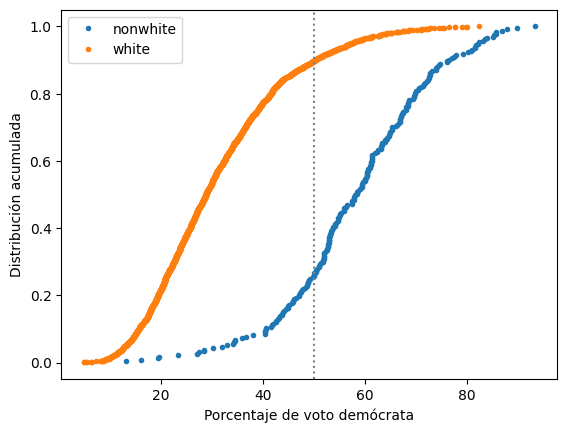

In [81]:
counties_nonwhite = df[df['acs_pct_pop_nonwhite'] > 50]
counties_white = df[df['acs_pct_pop_nonwhite'] <= 50]

def fdae(data):
    n=len(data)
    x=np.sort(data)
    y=np.arange(1,len(x)+1)/len(x)
    return(x,y)

dataset =[('nonwhite',counties_nonwhite), ('white',counties_white)]

for name, dats in dataset:
    x,y=fdae(dats['pct_D'])
    plt.plot(x,y,marker='.',ls='none',label=name)
    plt.legend()
    
    print('%s, media:%.2f, mediana:%.2f, std:%.2f, len:%.d'%(name,dats['pct_D'].mean(),dats['pct_D'].median(),dats['pct_D'].std(),len(dats['pct_D'])))
    

plt.xlabel('Porcentaje de voto demócrata')
plt.ylabel('Distribución acumulada')
_= plt.axvline(x=50,ls=':',color='gray')


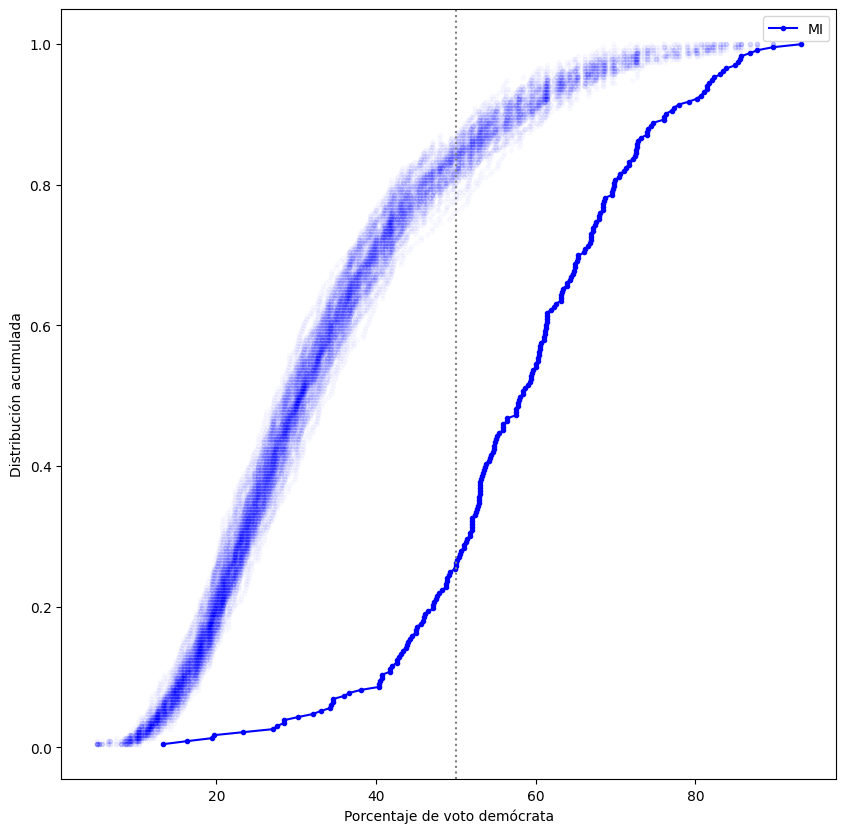

In [83]:
"""Generar una permutacion de dos datasets"""
def permutation_sample(data1):

    #datos concatenados
    data = data1.copy()

    # permutacion
    data['acs_pct_pop_nonwhite'] = np.random.permutation(data['acs_pct_pop_nonwhite'].values)

    return data[data['acs_pct_pop_nonwhite'] > 50]



#generamos n permutaciones
nperm=100
plt.figure(figsize=(10,10))
for n in range(nperm):
    perm = permutation_sample(df)
    x, y = fdae(perm['pct_D'])
    plt.plot(x,y,marker='.',ls='none',color='blue',alpha=0.02)


#graficamos las distribuciones originales de cada estado
x, y = fdae(counties_nonwhite['pct_D'])
plt.plot(x,y,marker='.',ls='-',label='MI',color='blue')

plt.legend()

plt.xlabel('Porcentaje de voto demócrata')
plt.ylabel('Distribución acumulada')
plt.axvline(x=50,ls=':',color='gray')

Promedio observada: 58.07
valor-p = 0.0


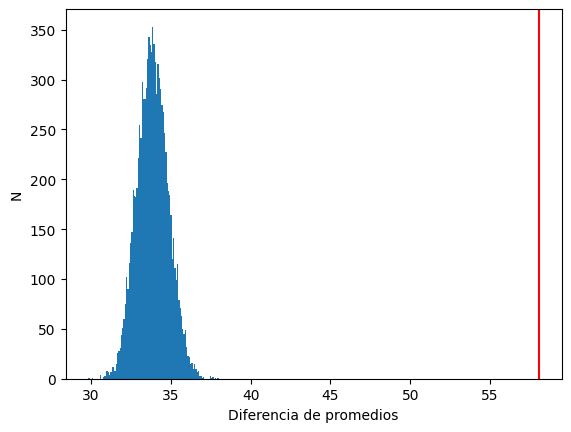

In [85]:
#observaciones (MI-WI)
obs_diff= counties_nonwhite['pct_D'].mean()

print(r'Promedio observada: %.2f'%obs_diff)

#permutaciones
size=10000

perm_replicates = np.empty(size)
for i in range(size):
    # Generar permutacion
    perm_sample_1 = permutation_sample(df)
    # Compute the test statistic
    perm_replicates[i] = perm_sample_1['pct_D'].mean()


#valor-p
pval = np.sum(perm_replicates >= obs_diff) / size
print('valor-p =', pval)

plt.hist(perm_replicates,bins=100)
plt.axvline(x=obs_diff,color='r',label='Observed difference')
plt.xlabel('Diferencia de promedios')
_ = plt.ylabel('N')

Se rechaza la hipótesis nula, por tanto queda demostrado que el voto de los condados con mayor porcentaje de población no blanca es totalmente distintivo y se decanta hacia el partido demócrata 

**3.** Imagine que ud. trabaja en una empresa de e-commerce, que está testeando un nuevo diseño de página web. El objetivo es lograr un aumento en la tasa de conversión (porcentaje de usuarios que realiza una compra) de al menos un 2%.

Para el testeo, se diseña un experimento en base a dos grupos:

> Grupo control (A): se les muestra la página original.

> Grupo de tratamiento (B): se les muestra el nuevo diseño. 

Para cada grupo, se monitorea la actividad en la página web y se asigna una tasa de conversión de acuerdo a la siguiente regla: 

    0 - El usuario no compró el producto durante la sesión en la página web. 
    1 - El usuario si compró el producto durante la sesión en la página web. 

El experimento se desarrolla durante un mes, y para cada día se reporta la tasa de conversión promedio de cada grupo. Los datos están contenidos en el archivo `abtest.csv`.

Para este caso, diseñe e implemente un testeo A/B que permita determinar si el diseño de la nueva página es o no efectivo.

In [3]:
df = pd.read_csv('../data/abtest.csv')
df.head()

,Day,Conversion_A,Conversion_B
0,1,0.15,0.19
1,2,0.12,0.20
2,3,0.18,0.18
3,4,0.19,0.22
4,5,0.17,0.19


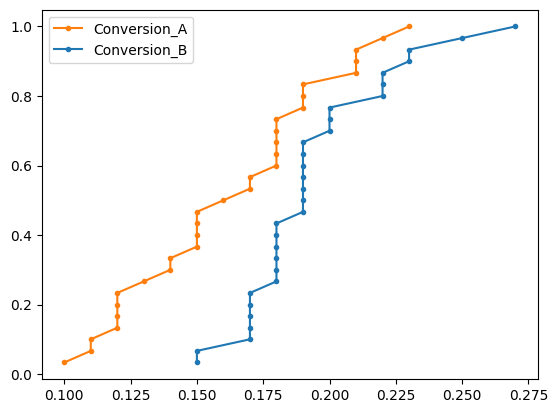

In [15]:
def fdae(data):
    n=len(data)
    x=np.sort(data)
    y=np.arange(1,len(x)+1)/len(x)
    return(x,y)

x, y = fdae(df['Conversion_A'])
plt.plot(x, y, marker='.',ls='-', c='C01', label='Conversion_A')

x, y = fdae(df['Conversion_B'])
plt.plot(x, y, marker='.', ls='-', c='C00',label= 'Conversion_B')

plt.legend()
plt.show()

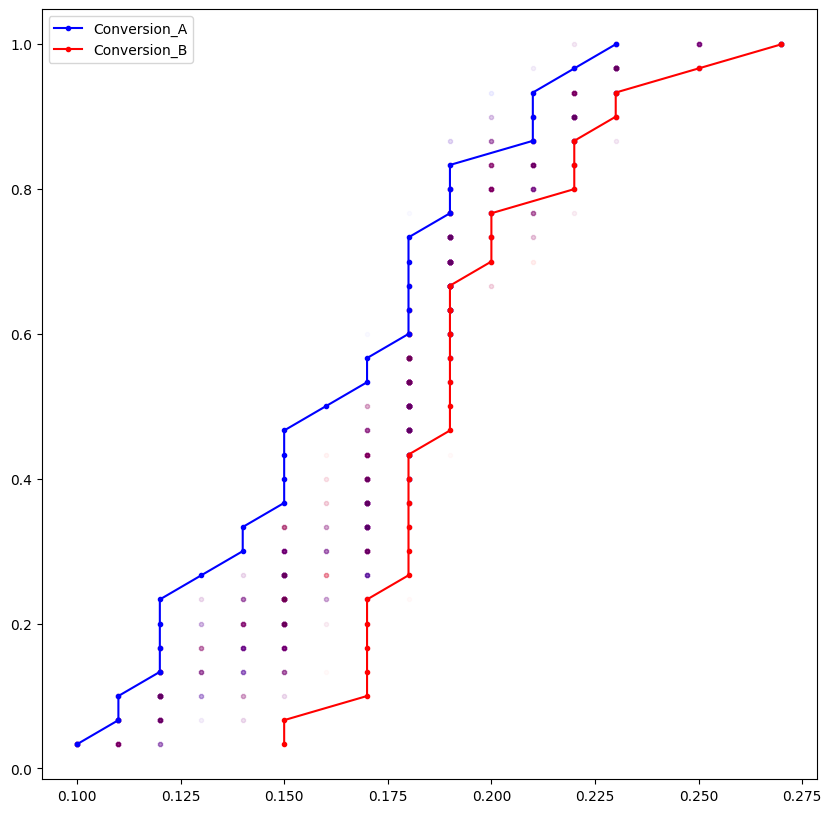

In [18]:
"""Generar una permutacion de dos datasets"""
def permutation_sample(data1, data2):

    #datos concatenados
    data = np.concatenate((data1, data2))

    # permutacion
    permuted_data = np.random.permutation(data)

    #muestras permutadas
    perm_sample_1 = permuted_data[:len(data1)]
    perm_sample_2 = permuted_data[len(data2):]

    return perm_sample_1, perm_sample_2


#datos por estado
A=df['Conversion_A']
B=df['Conversion_B']

#generamos n permutaciones
nperm=100
plt.figure(figsize=(10,10))
for n in range(nperm):
    perm1, perm2 = permutation_sample(A, B)

    x, y= fdae(perm1)
    plt.plot(x, y, marker='.', ls='none', color='blue', alpha=0.02)
    
    x, y= fdae(perm2)
    plt.plot(x, y, marker='.', ls='none', color='red', alpha=0.02)

#graficamos las distribuciones originales de cada estado
x,y=fdae(A)
plt.plot(x,y,marker='.',ls='-',label='Conversion_A',color='blue')
x,y=fdae(B)
plt.plot(x,y,marker='.',ls='-',label='Conversion_B',color='red')
plt.legend()

# plt.axvline(x=50,ls=':',color='gray')
plt.show()

Diferencia promedio observada:0.03
valor-p = 0.0002


Text(0, 0.5, 'N')

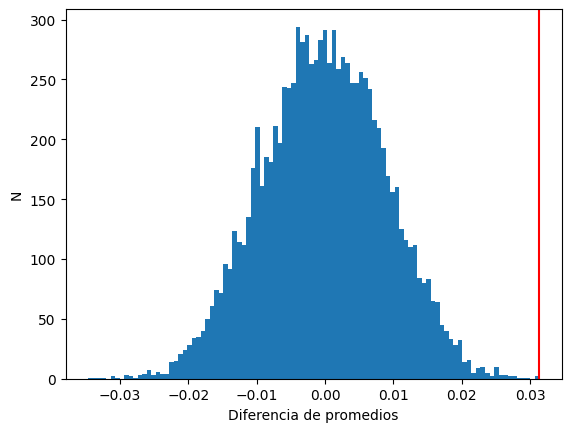

In [19]:
"""Generate multiples replicas de la diferencia media para las permutaciones."""
def perm_reps(data_1, data_2, size=1):

    # Initializar arreglo dereplicas
    perm_replicates = np.empty(size)

    for i in range(size):
        # Generar permutacion
        perm_sample_1, perm_sample_2 = permutation_sample(data_1, data_2)

        # Compute the test statistic
        perm_replicates[i] = perm_sample_1.mean()-perm_sample_2.mean()

    return perm_replicates

#observaciones (MI-WI)
obs_diff= B.mean() - A.mean()

print(r'Diferencia promedio observada:%.2f'%obs_diff)

#permutaciones
nperm=10000
perm_replicates = perm_reps(A, B, size=nperm)

#valor-p
pval=np.sum(perm_replicates>=obs_diff)/len(perm_replicates)
print('valor-p =', pval)

_=plt.hist(perm_replicates,bins=100)
_=plt.axvline(x=obs_diff,color='r',label='Observed difference')
plt.xlabel('Diferencia de promedios')
plt.ylabel('N')

Para determinar si el nuevo diseño de la página web es efectivo, se puede utilizar un test A/B con un nivel de confianza del 95%. 

Para ello, se pueden seguir los siguientes pasos:

Se establece la hipótesis nula H0, que en este caso sería que no hay diferencia significativa entre las tasas de conversión de los grupos control y de tratamiento. La hipótesis alternativa H1 es que el nuevo diseño de la página web logra un aumento en la tasa de conversión.
H0: tasa de conversión promedio del grupo control - tasa de conversión promedio del grupo de tratamiento = 0

H1: tasa de conversión promedio del grupo control - tasa de conversión promedio del grupo de tratamiento > 0

- Se define el nivel de significancia α de 0.05 y se calcula el tamaño de muestra necesario para detectar una diferencia mínima deseada de 2% en la tasa de conversión. 
- Se realiza la asignación aleatoria de los usuarios a los grupos control y de tratamiento de forma equitativa.
- Se recolectan los datos durante un mes y se calcula la tasa de conversión promedio diaria para cada grupo.
- Se realiza el test de hipótesis para calcular el valor p y determinar si la diferencia observada entre las tasas de conversión es estadísticamente significativa. Si el valor p es menor que α, se rechaza H0 y se acepta H1, lo que indica que el nuevo diseño de la página web logra una mejora en la tasa de conversión. 
- Se analiza la magnitud de la diferencia observada y se calcula el intervalo de confianza para estimar el rango de valores en los que se encuentra la verdadera diferencia entre las tasas de conversión de los grupos. 
- Se documenta y se presenta los resultados obtenidos.

*Nota: para realizar el test A/B, se puede utilizar una herramienta de análisis de datos o programación estadística como R o Python. También puede realizarse manualmente utilizando la fórmula t-test para dos muestras independientes.